# Crude Onshore Inventories Notebook

This notebook will give a tutorial on how to query the onshore crude inventories data through pythonSDK.


Content:
1. [Import Libraries](#Import-Libraries)
2. [Extract storage location ids](#Extract-storage-location-ids)
3. [Crude Inventories Search endpoint](#1.-Crude-Inventories-Search-endpoint)
4. [Crude Onshore Inventories Time Series](#2.-Crude-Onshore-Inventories-Time-Series-endpoint)
5. [Case study](#Case-study:-US-Cushing-Stockpile-vs-Brent-prices)
6. [Benchmarking result](#Benchmarking-result)

## Import Libraries

In [1]:
import vortexasdk as v
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import json
from pprint import pprint
import plotly.graph_objects as go

## 1. Crude Inventories Search endpoint

In [2]:
cushing = 'cde783a902c7837b814dfa5988ed74fb14841c2999d6984952c7cbfc543d5073'
china = [p.id for p in v.Geographies().search('China').to_list() if p.name=='China']

2024-06-18 13:28:35,639 vortexasdk.client — WARNING — You are using vortexasdk version 0.72.1, however version 0.72.4 is available.
You should consider upgrading via the 'pip install vortexasdk --upgrade' command.


In [3]:
data_df = v.OnshoreInventoriesSearch().search(
        crude_confidence=['confirmed', 'probable'],
        location_ids = china,
        time_min=datetime(2023, 3, 1),
        time_max=datetime(2023, 3, 14)).to_df(columns = 'all')

In [4]:
data_df.head()

,measurement_id,tank_id,tank_details.id,tank_details.lat,tank_details.lon,tank_details.name,tank_details.leaf,tank_details.ref_type,tank_details.storage_terminal_name,tank_details.storage_terminal_id,...,tank_details.corporate_entity_details.layer,measurement_timestamp,publish_timestamp,fill_bbl,fill_tons,fill_cbm,reference_data_version,tank_details.location_details.20.id,tank_details.location_details.20.label,tank_details.location_details.20.layer
0,000e025d8be0f76d3fe6a23bbd6867436ff751ad8fe9d8...,1432c91cc383424b9fa048a7cc3fbe87747aa5e575a3e2...,1432c91cc383424b9fa048a7cc3fbe87747aa5e575a3e2...,38.741916,116.126142,RNQ017,True,asset_tank,PetroChina Huabei Petrochemical Company,42fbc2520c8c4ac8a6700e097c2ad844d039d1b247e41d...,...,commercial_owner,2023-03-02 10:13:39,2023-03-03 18:00:01,53429,7305.293741,8494.569852,current-1718644569619,,,
1,002258e11e1717dc53b2c8735b00f54d75e849d004d7f7...,e3dce2b1bd63fecd21d29ed3d0202312442f00a26099c7...,e3dce2b1bd63fecd21d29ed3d0202312442f00a26099c7...,37.517299,118.230589,LIJ015,True,asset_tank,Lijin Petrochemical Plant,c0b0ea648002e374444260fe9b6a271924f49ef8a498aa...,...,,2023-03-09 10:05:13,2023-03-10 20:45:01,66175,9048.041575,10521.030900,current-1718644569619,c0b0ea648002e374444260fe9b6a271924f49ef8a498aa...,Lijin Petrochemical Plant,storage_terminal
2,00404b3ff89516937cc89cebef5c52b9a1353d4c01702d...,361a785fa9c2c39b2557cd64c1baced5e2c410cd6fa782...,361a785fa9c2c39b2557cd64c1baced5e2c410cd6fa782...,21.155883,110.397750,ZNJ021,True,asset_tank,Zhanjiang PetroChina Fuel,e3be6c86fb309b0ef96a5e1de6d001ca335f8d81d33ecc...,...,commercial_owner,2023-03-07 10:43:19,2023-03-07 16:15:02,455802,62321.351658,72467.048376,current-1718644569619,,,
3,0049b34996b7cd25ddde7bc914d34b9aabe7ba68e4b178...,676ea048840154e85dd9bcfd140339dc6a9c2b2f4d9ef7...,676ea048840154e85dd9bcfd140339dc6a9c2b2f4d9ef7...,38.979346,121.887020,DAL204,True,asset_tank,Dalian Xingang,3c6330a555f7eb91525c0be78b890650cbf656f16bd51d...,...,,2023-03-11 09:49:21,2023-03-15 16:45:02,66538,9097.674202,10578.743544,current-1718644569619,3c6330a555f7eb91525c0be78b890650cbf656f16bd51d...,Dalian Xingang,storage_terminal
4,00613b4c9de5f21fee02b43a71610c6bb4916dca173cfb...,1e26d3bbdd8b8d0bb6d0dc75231695ba69c09b3ca49fd0...,1e26d3bbdd8b8d0bb6d0dc75231695ba69c09b3ca49fd0...,35.146944,119.367234,LSH076,True,asset_tank,Zhonghaiwai Energy,f076a62dddb008ac03b6b9312da7813c8c27070cb92770...,...,,2023-03-02 22:11:26,2023-03-09 11:03:51,26043,3560.833347,4140.524484,current-1718644569619,f076a62dddb008ac03b6b9312da7813c8c27070cb92770...,Zhonghaiwai Energy,storage_terminal


In [5]:
data_list = v.OnshoreInventoriesSearch().search(
        crude_confidence=['confirmed', 'probable'],
        location_ids = china,
        time_min=datetime(2023, 3, 1),
        time_max=datetime(2023, 3, 14)).to_list()

In [6]:
pprint(data_list[0].dict())

{'fill_bbl': 53429,
 'fill_cbm': 8494.569851999999,
 'fill_tons': 7305.2937409999995,
 'measurement_id': '000e025d8be0f76d3fe6a23bbd6867436ff751ad8fe9d85f30846afcfc077d19',
 'measurement_timestamp': '2023-03-02T10:13:39',
 'publish_timestamp': '2023-03-03T18:00:01',
 'reference_data_version': 'current-1718644569619',
 'tank_details': {'capacity_bbl': 318884,
                  'capacity_cbm': 50698,
                  'capacity_ton': 43600,
                  'corporate_entity_details': {'id': 'f78558ef7c9b9f162545a56b330111c274d578a2933f46ec82ee004ca4f449bd',
                                               'label': 'PETROCHINA',
                                               'layer': 'commercial_owner'},
                  'corporate_entity_id': 'f78558ef7c9b9f162545a56b330111c274d578a2933f46ec82ee004ca4f449bd',
                  'crude_confidence': 'confirmed',
                  'id': '1432c91cc383424b9fa048a7cc3fbe87747aa5e575a3e2c65479da8a7fd630d0',
                  'last_updated': '20

## 2. Crude Onshore Inventories Time Series endpoint

In [7]:
shandong = [p.id for p in v.StorageTerminals().search(term ='Shandong').to_list() if p.name=='Shandong Province']

In [8]:
df = v.OnshoreInventoriesTimeseries().search(
        crude_confidence=['confirmed', 'probable'],
        location_ids = shandong,
        time_min=datetime(2022, 1, 1),
        time_max=datetime.today(),
        timeseries_frequency = 'day',
        timeseries_unit = 'b'
).to_df(columns = 'all').set_index('key')

df2 = v.OnshoreInventoriesTimeseries().search(
        crude_confidence=['confirmed', 'probable'],
        location_ids = china,
        time_min=datetime(2022, 1, 1),
        time_max=datetime.today(),
        timeseries_frequency = 'day',
        timeseries_unit = 'b'
).to_df(columns = 'all').set_index('key')

In [9]:
# Create traces
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
    x=df.index, y=df['value'],
    line_color='rgb(0,100,80)',
    name='Shandong'),
    secondary_y=False
)

fig.add_trace(go.Scatter(
    x=df2.index, y=df2['value'],
    line_color='rgb(255,100,80)',
    name='china'),
    secondary_y=True
)

fig.update_layout(
    title_text="Shandong vs China Crude Inventories (bbls)"
)

# Set y-axes titles
fig.update_yaxes(title_text="Shandong volume", secondary_y=False)
fig.update_yaxes(title_text="China volume", secondary_y=True)

fig.show()

***Shandong Inventories decline but remain a crucial outlier***

Shandong crude stocks have been falling consistently sisnce mid last year, but are still well above year-earlier levels.

This contrasts with total China inventories now falling close to historical norms and global inventories currently at lows.

Shandong's independent refiners can continue to draw at current rates for the next 6 months and still remain above historical avearage.

## Case study: US Cushing Stockpile vs Brent prices

In [6]:
import yfinance as yf
price_history = yf.Ticker('BZ=Fdsdsds').history(period='2y', # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                                   interval='2d', # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                                   actions=False)

BZ=FDSDSDS: Invalid input - interval=2d is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]


In [7]:
len(price_history)

0

In [12]:
df3 = v.OnshoreInventoriesTimeseries().search(
        crude_confidence=['confirmed', 'probable'],
        location_ids = cushing,
        time_min=datetime(2022, 1, 1),
        time_max=datetime.today(),
        timeseries_frequency = 'day',
        timeseries_unit = 'b'
).to_df(columns = 'all').set_index('key')

In [13]:
# Create traces
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
    x=df3.index, y=df3['value'],
    line_color='rgb(0,100,80)',
    name='US Crude stockpiles'),
    secondary_y=False
)

fig.add_trace(go.Scatter(
    x=price_history.index, y=price_history['Open'],
    line_color='rgb(255,100,80)',
    name='Brent Price'),
    secondary_y=True
)

fig.update_layout(
    title_text="US Cushing stockpiles vs Brent Price"
)

# Set y-axes titles
fig.update_yaxes(title_text="Cushing volume (b)", secondary_y=False)
fig.update_yaxes(title_text="Brent Price ($)", secondary_y=True)

fig.show()

***Vortexa data as a leading indicator of inventories data as it publishes more than a weekly basis, which can be useful for price analysis.***

Inverse correlation is found for cushing volume vs Brent prices. As Vortexa publishes measurement readings for each tank whenever we receive it, the frequency in data is more competitive than publicly available data such as Energy Information Administration (EIA).

## Benchmarking result

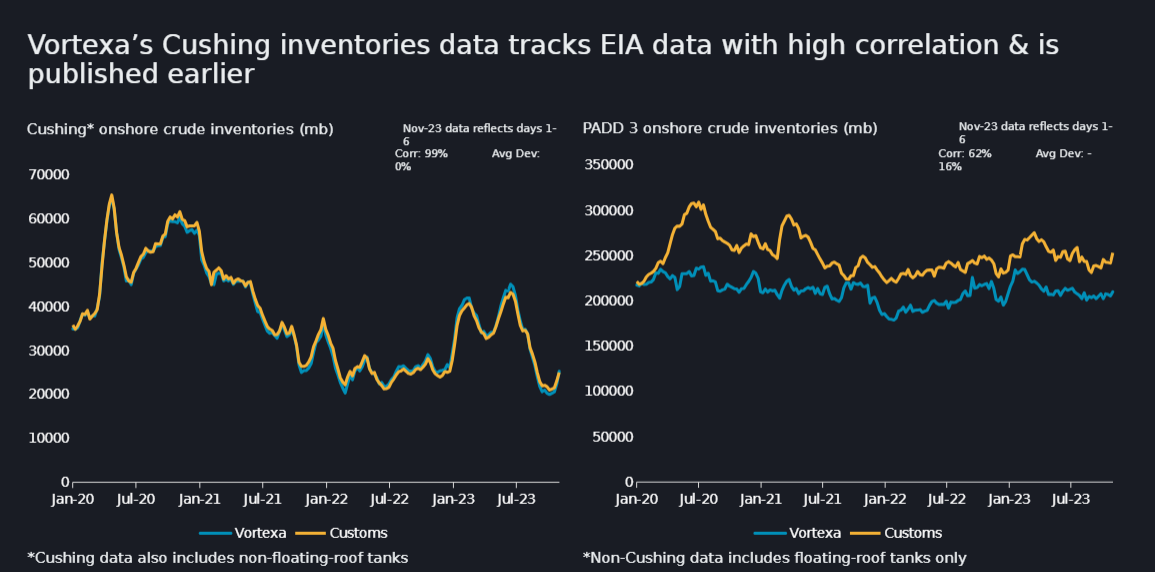